### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#### Import and Read Data

In [3]:
house_sales_price = pd.read_csv("train.csv")

In [4]:
house_sales_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspect the Dataframe

In [5]:
house_sales_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house_sales_price.shape

(1460, 81)

In [7]:
house_sales_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Data Cleaning

In [8]:
# Make a copy of original dataframe and clean the data
retained_house_sales_price = house_sales_price

In [9]:
# Checking column-wise null percentages
round(retained_house_sales_price.isnull().sum() * 100 / len(retained_house_sales_price), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [10]:
# Drop columns with 50% or more Null Values
limitPer = len(retained_house_sales_price) * .50
retained_house_sales_price = retained_house_sales_price.dropna(thresh=limitPer,axis=1)

In [11]:
# Drop rows where more than 5 fields are missing
retained_house_sales_price.drop(retained_house_sales_price[retained_house_sales_price.isnull().sum(axis=1)>5].index,axis=0,inplace=True)

In [12]:
# Checking percentage of NaN values
print(round(100*(retained_house_sales_price.isnull().sum()/len(retained_house_sales_price.index)),2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.06
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 77, dtype: float64


In [13]:
retained_house_sales_price.shape

(1362, 77)

In [14]:
retained_house_sales_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 77 columns):
Id               1362 non-null int64
MSSubClass       1362 non-null int64
MSZoning         1362 non-null object
LotFrontage      1116 non-null float64
LotArea          1362 non-null int64
Street           1362 non-null object
LotShape         1362 non-null object
LandContour      1362 non-null object
Utilities        1362 non-null object
LotConfig        1362 non-null object
LandSlope        1362 non-null object
Neighborhood     1362 non-null object
Condition1       1362 non-null object
Condition2       1362 non-null object
BldgType         1362 non-null object
HouseStyle       1362 non-null object
OverallQual      1362 non-null int64
OverallCond      1362 non-null int64
YearBuilt        1362 non-null int64
YearRemodAdd     1362 non-null int64
RoofStyle        1362 non-null object
RoofMatl         1362 non-null object
Exterior1st      1362 non-null object
Exterior2nd      1362 non

In [15]:
# Checking number of retained rows here
retained_rows_count = retained_house_sales_price.shape[0]
percentage_of_retained_rows = round((retained_house_sales_price.shape[0] / house_sales_price.shape[0]) * 100, 2)

display("No.Of retained rows: {0}".format(retained_rows_count))
display("Percentage Of retained rows: {0}".format(percentage_of_retained_rows))

'No.Of retained rows: 1362'

'Percentage Of retained rows: 93.29'

#### Data Preparation

In [16]:
#Taking a deep dive into the Basement related attributes to understand the correlations
house_basement=retained_house_sales_price[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
house_basement.head()
house_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 8 columns):
BsmtQual        1356 non-null object
BsmtExposure    1355 non-null object
BsmtFinType1    1356 non-null object
BsmtFinType2    1355 non-null object
BsmtFinSF1      1362 non-null int64
BsmtFinSF2      1362 non-null int64
BsmtUnfSF       1362 non-null int64
TotalBsmtSF     1362 non-null int64
dtypes: int64(4), object(4)
memory usage: 95.8+ KB


<Figure size 1440x720 with 0 Axes>

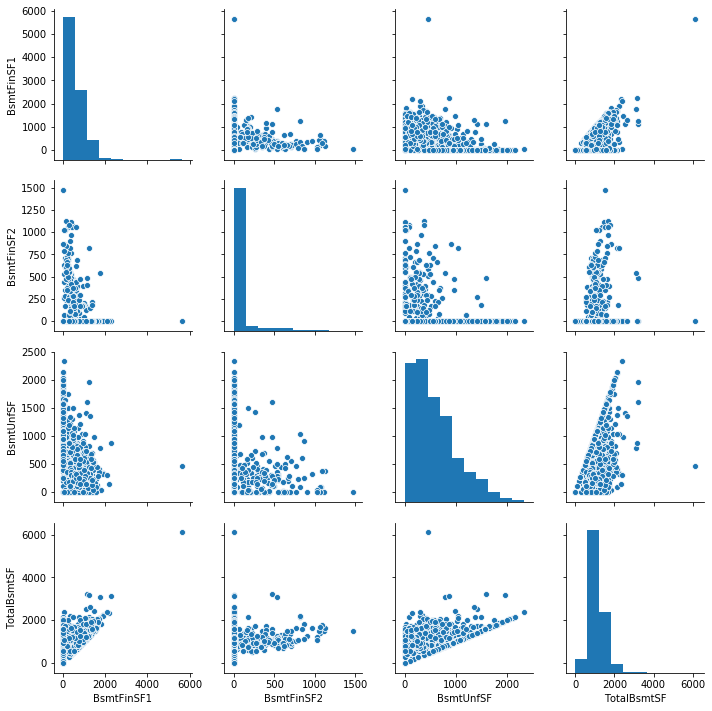

In [17]:
# pairwise scatter plot to explore Basement attributes

plt.figure(figsize=(20, 10))
sns.pairplot(house_basement)
plt.show()

In [18]:
#Dropping of correlated variables and keeping only TotalBsmtSF as this is the key one remaining are related to it.
retained_house_sales_price=retained_house_sales_price.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

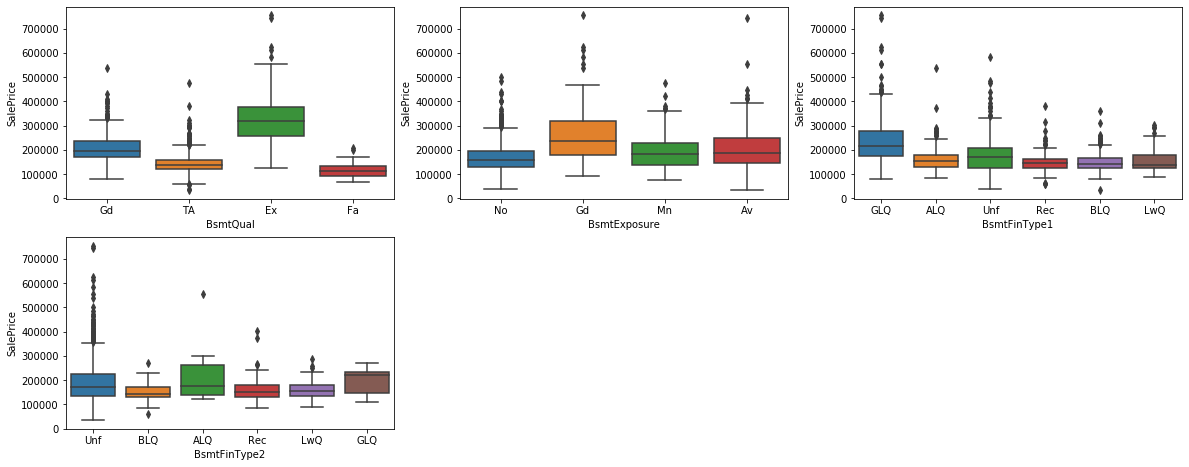

In [19]:
#Plotting the categorical variables related to Basement to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = retained_house_sales_price)

In [20]:
#Dropping variables BsmtFinType1 and BsmtFinType2 as two do not seem to have a strong influence on sale price
retained_house_sales_price=retained_house_sales_price.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

In [21]:
#Cleaning up variable GarageType (Replacing NA => No Garage)
retained_house_sales_price['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(retained_house_sales_price['GarageType'].value_counts()/retained_house_sales_price['GarageType'].count())

Attchd       63.362702
Detchd       27.312775
BuiltIn       6.461087
Basment       1.395007
No Garage     0.513950
CarPort       0.513950
2Types        0.440529
Name: GarageType, dtype: float64

In [22]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
retained_house_sales_price['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(retained_house_sales_price['GarageFinish'].value_counts()/retained_house_sales_price['GarageFinish'].count())

Unf          42.804699
RFn          30.910426
Fin          25.770925
No Garage     0.513950
Name: GarageFinish, dtype: float64

In [23]:
#Cleaning up variable GarageQual (Replacing NA => No Garage)
retained_house_sales_price['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
print(100*(retained_house_sales_price['GarageQual'].value_counts()/retained_house_sales_price['GarageQual'].count()))
#Imputing level values of GarageQual
retained_house_sales_price['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
retained_house_sales_price['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
retained_house_sales_price['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
retained_house_sales_price['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
retained_house_sales_price['GarageQual'].replace({'Po':'No Garage'},inplace=True)
print(100*(retained_house_sales_price['GarageQual'].value_counts()/retained_house_sales_price['GarageQual'].count()))

TA           94.493392
Fa            3.524229
Gd            1.027900
No Garage     0.513950
Po            0.220264
Ex            0.220264
Name: GarageQual, dtype: float64
OK Garage    99.265786
No Garage     0.734214
Name: GarageQual, dtype: float64


In [24]:
#Cleaning up variable GarageCond (Replacing NA => No Garage)
retained_house_sales_price['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(retained_house_sales_price['GarageCond'].value_counts()/retained_house_sales_price['GarageCond'].count()))
#Imputing level values of GarageCond
retained_house_sales_price['GarageCond'].replace({'TA':'OK'},inplace=True)
retained_house_sales_price['GarageCond'].replace({'Fa':'OK'},inplace=True)
retained_house_sales_price['GarageCond'].replace({'Gd':'OK'},inplace=True)
retained_house_sales_price['GarageCond'].replace({'Ex':'OK'},inplace=True)
retained_house_sales_price['GarageCond'].replace({'Po':'No Garage'},inplace=True)
print(100*(retained_house_sales_price['GarageCond'].value_counts()/retained_house_sales_price['GarageCond'].count()))

TA           95.741557
Fa            2.422907
Gd            0.660793
Po            0.513950
No Garage     0.513950
Ex            0.146843
Name: GarageCond, dtype: float64
OK           98.9721
No Garage     1.0279
Name: GarageCond, dtype: float64


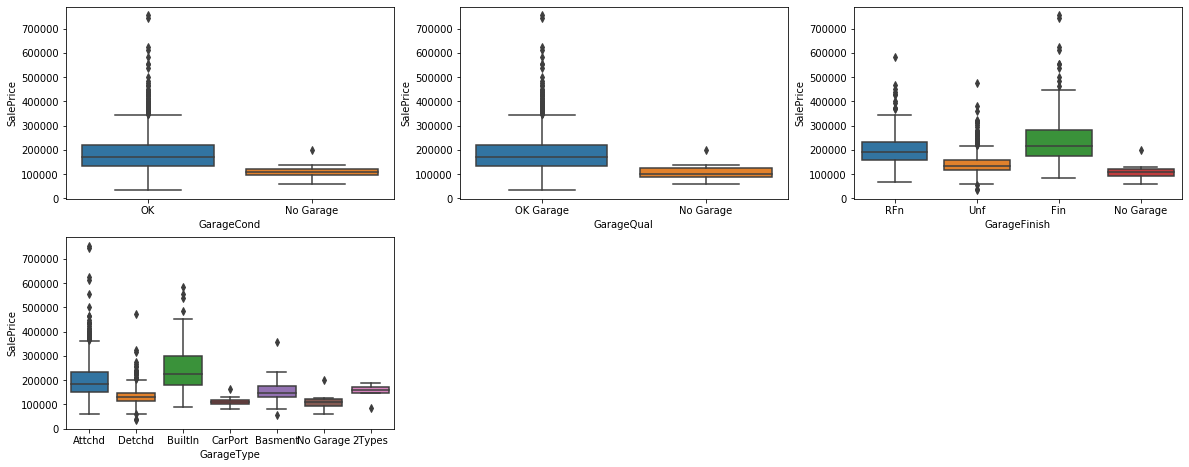

In [25]:
#Plotting the categorical variables related to Garage and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = retained_house_sales_price)

In [26]:
#GarageCond and GarageQual seem to be same in influence on SalePrice, one can be dropped
retained_house_sales_price=retained_house_sales_price.drop(['GarageQual'],axis=1)

#Garage type - CarPort, No Garage, Basement, 2Types can be combined as "Others"
#Imputing values to "Others"
retained_house_sales_price['GarageType'].replace({'CarPort':'No Garage'},inplace=True)
retained_house_sales_price['GarageType'].replace({'Basment':'No Garage'},inplace=True)
retained_house_sales_price['GarageType'].replace({'No Garage':'No Garage'},inplace=True)
retained_house_sales_price['GarageType'].replace({'2Types':'No Garage'},inplace=True)
print(100*(retained_house_sales_price['GarageType'].value_counts()/retained_house_sales_price['GarageType'].count()))

Attchd       63.362702
Detchd       27.312775
BuiltIn       6.461087
No Garage     2.863436
Name: GarageType, dtype: float64


In [27]:
#Cleaning up variable FireplaceQu (Replacing NA => No Fireplace)
retained_house_sales_price['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
print(100*(retained_house_sales_price['FireplaceQu'].value_counts()/retained_house_sales_price['FireplaceQu'].count()))
#Imputing level values of FireplaceQu
retained_house_sales_price['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
retained_house_sales_price['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
retained_house_sales_price['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
retained_house_sales_price['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
retained_house_sales_price['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
print(100*(retained_house_sales_price['FireplaceQu'].value_counts()/retained_house_sales_price['FireplaceQu'].count()))

No Fireplace    43.759178
Gd              27.753304
TA              22.834068
Fa               2.422907
Ex               1.762115
Po               1.468429
Name: FireplaceQu, dtype: float64
OK Fireplace    56.240822
No Fireplace    43.759178
Name: FireplaceQu, dtype: float64


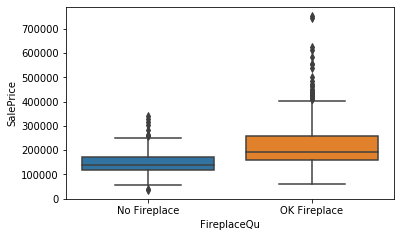

In [28]:
#Plotting the categorical variables related to FireplaceQu and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = retained_house_sales_price)

> Clearly Fireplace presence drives Sale price to some extent

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0           61              0          0            0
1            0              0          0            0
2           42              0          0            0
3           35            272          0            0
4           84              0          0            0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 4 columns):
OpenPorchSF      1362 non-null int64
EnclosedPorch    1362 non-null int64
3SsnPorch        1362 non-null int64
ScreenPorch      1362 non-null int64
dtypes: int64(4)
memory usage: 93.2 KB
None


<Figure size 1440x720 with 0 Axes>

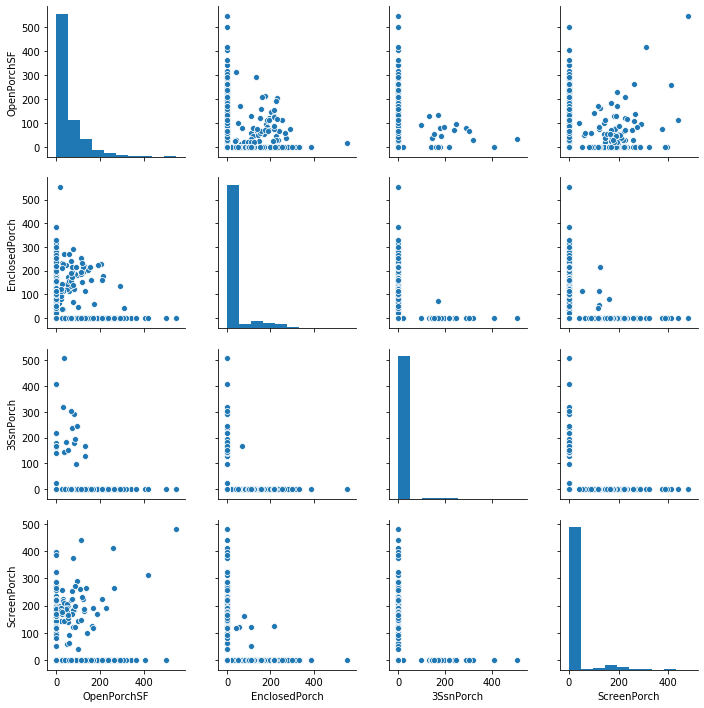

In [29]:
#Taking a deep dive into the Basement related attributes to understand the correlations
house_sales_price_porch=retained_house_sales_price[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]
print(house_sales_price_porch.head())
print(house_sales_price_porch.info())
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(house_sales_price_porch)
plt.show()

In [30]:
#From the correlation pairplots, Out of four variables on Porch, we can capture key effects from Open Porch and Enclosed Porch
retained_house_sales_price=retained_house_sales_price.drop(['ScreenPorch','3SsnPorch'],axis=1)

In [31]:
print(100*(retained_house_sales_price['Neighborhood'].astype('category').value_counts()/retained_house_sales_price['Neighborhood'].count()))
#Imputing values of the minor category levels in Neighborhood
retained_house_sales_price['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
retained_house_sales_price['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
print(100*(retained_house_sales_price['Neighborhood'].astype('category').value_counts()/retained_house_sales_price['Neighborhood'].count()))

NAmes      15.491924
CollgCr    10.866373
OldTown     7.488987
Somerst     6.314244
Gilbert     5.726872
NridgHt     5.653451
NWAmes      5.359765
Edwards     5.359765
Sawyer      5.066079
SawyerW     4.038179
Crawfor     3.744493
BrkSide     3.524229
Mitchel     3.157122
NoRidge     3.010279
Timber      2.790015
IDOTRR      2.129222
ClearCr     2.055800
StoneBr     1.835536
SWISU       1.468429
Blmngtn     1.248164
BrDale      1.101322
MeadowV     0.954479
Veenker     0.807636
NPkVill     0.660793
Blueste     0.146843
Name: Neighborhood, dtype: float64
NAmes      15.491924
CollgCr    10.866373
Others     10.279001
OldTown     7.488987
Somerst     6.314244
Gilbert     5.726872
NridgHt     5.653451
NWAmes      5.359765
Edwards     5.359765
Sawyer      5.066079
SawyerW     4.038179
Crawfor     3.744493
BrkSide     3.524229
Mitchel     3.157122
NoRidge     3.010279
Timber      2.790015
IDOTRR      2.129222
Name: Neighborhood, dtype: float64


In [32]:
#Binning of the Year built variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_names=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
retained_house_sales_price['YearBuilt']=pd.cut(retained_house_sales_price['YearBuilt'],bins,labels=slot_names,include_lowest=True)
print(100*(retained_house_sales_price['YearBuilt'].value_counts()/retained_house_sales_price['YearBuilt'].count()))

1950-1975    31.350954
2001-2010    25.036711
1991-2000    13.876652
1925-1950    10.939794
1872-1925     9.691630
1976-1990     9.104258
Name: YearBuilt, dtype: float64


In [33]:
#Binning of the YearRemodAdd variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1950,1976,1991,2001,2010]
slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
retained_house_sales_price['YearRemodAdd']=pd.cut(retained_house_sales_price['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)
100*(retained_house_sales_price['YearRemodAdd'].value_counts()/retained_house_sales_price['YearRemodAdd'].count())

2001-2010    33.847283
1950-1975    23.788546
1991-2000    20.631424
1976-1990    10.939794
1872-1950    10.792952
Name: YearRemodAdd, dtype: float64

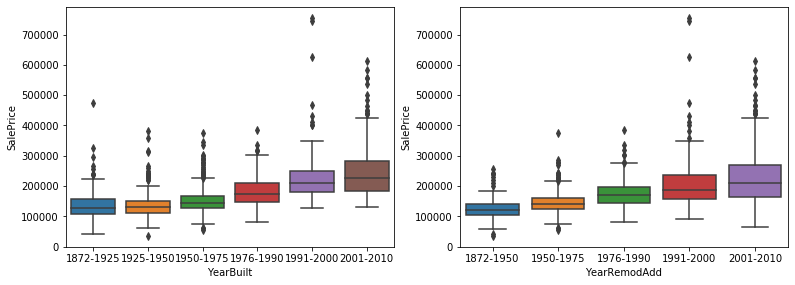

In [34]:
#Plotting the categorical variables related toYear Built and Year Remodified to find which ones have correlation and can be dropped
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = retained_house_sales_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = retained_house_sales_price)

In [35]:
#Converting the binned year columns as object datatype
retained_house_sales_price['YearBuilt']=retained_house_sales_price['YearBuilt'].values.astype(np.object)
retained_house_sales_price['YearRemodAdd']=retained_house_sales_price['YearRemodAdd'].values.astype(np.object)

In [36]:
#Cleaning up variable LotFrontage (Replacing NA => 0)
retained_house_sales_price['LotFrontage'].replace({np.nan:'0'},inplace=True)
retained_house_sales_price['LotFrontage']=retained_house_sales_price['LotFrontage'].values.astype(np.int64)
100*(retained_house_sales_price['LotFrontage'].value_counts()/retained_house_sales_price['LotFrontage'].count())
retained_house_sales_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 69 columns):
Id               1362 non-null int64
MSSubClass       1362 non-null int64
MSZoning         1362 non-null object
LotFrontage      1362 non-null int64
LotArea          1362 non-null int64
Street           1362 non-null object
LotShape         1362 non-null object
LandContour      1362 non-null object
Utilities        1362 non-null object
LotConfig        1362 non-null object
LandSlope        1362 non-null object
Neighborhood     1362 non-null object
Condition1       1362 non-null object
Condition2       1362 non-null object
BldgType         1362 non-null object
HouseStyle       1362 non-null object
OverallQual      1362 non-null int64
OverallCond      1362 non-null int64
YearBuilt        1362 non-null object
YearRemodAdd     1362 non-null object
RoofStyle        1362 non-null object
RoofMatl         1362 non-null object
Exterior1st      1362 non-null object
Exterior2nd      1362 non

In [37]:
retained_house_sales_price=retained_house_sales_price.drop(['GarageYrBlt'],axis=1) # As it is same as Year Built

In [38]:
#Replacing missing value with Unknown
retained_house_sales_price['Electrical'].replace({np.nan:'Unknown'},inplace=True)
print(100*(retained_house_sales_price['Electrical'].value_counts()/retained_house_sales_price['Electrical'].count()))
#Imputing the minor category levels of Electrical
retained_house_sales_price['Electrical'].replace({'FuseA':'Other'},inplace=True)
retained_house_sales_price['Electrical'].replace({'FuseF':'Other'},inplace=True)
retained_house_sales_price['Electrical'].replace({'FuseP':'Other'},inplace=True)
retained_house_sales_price['Electrical'].replace({'Mix':'Other'},inplace=True)
retained_house_sales_price['Electrical'].replace({'Unknown':'Other'},inplace=True)
print(100*(retained_house_sales_price['Electrical'].value_counts()/retained_house_sales_price['Electrical'].count()))

SBrkr      92.804699
FuseA       5.653451
FuseF       1.248164
FuseP       0.146843
Mix         0.073421
Unknown     0.073421
Name: Electrical, dtype: float64
SBrkr    92.804699
Other     7.195301
Name: Electrical, dtype: float64


In [39]:
# checking whether some rows have more than 1 missing values
len(retained_house_sales_price[retained_house_sales_price.isnull().sum(axis=1) > 1].index)

14

In [40]:
#NULL Rows dropped 
retained_house_sales_price=retained_house_sales_price.dropna(how='any',axis=0)

In [41]:
#Dropping column MasVnrarea and LotFrontage as these are not adding value
retained_house_sales_price=retained_house_sales_price.drop(['MasVnrArea','LotFrontage'],axis=1)

In [42]:
# percentage of missing values in each column
round(retained_house_sales_price.isnull().sum()/len(retained_house_sales_price.index), 2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 66, dtype: float64

#### Data Exploration

In [43]:
# all numeric (float and int) variables in the dataset
house_numeric = retained_house_sales_price.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,856,856,854,0,1710,...,2,548,0,61,0,0,0,2,2008,208500
1,2,20,9600,6,8,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,920,920,866,0,1786,...,2,608,0,42,0,0,0,9,2008,223500
3,4,70,9550,7,5,756,961,756,0,1717,...,3,642,0,35,272,0,0,2,2006,140000
4,5,60,14260,8,5,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,12,2008,250000


In [44]:
# dropping ID column 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,856,856,854,0,1710,1,...,2,548,0,61,0,0,0,2,2008,208500
1,20,9600,6,8,1262,1262,0,0,1262,0,...,2,460,298,0,0,0,0,5,2007,181500
2,60,11250,7,5,920,920,866,0,1786,1,...,2,608,0,42,0,0,0,9,2008,223500
3,70,9550,7,5,756,961,756,0,1717,1,...,3,642,0,35,272,0,0,2,2006,140000
4,60,14260,8,5,1145,1145,1053,0,2198,1,...,3,836,192,84,0,0,0,12,2008,250000


In [45]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,SalePrice
0,8450,856,856,854,0,1710,548,0,61,0,0,0,208500
1,9600,1262,1262,0,0,1262,460,298,0,0,0,0,181500
2,11250,920,920,866,0,1786,608,0,42,0,0,0,223500
3,9550,756,961,756,0,1717,642,0,35,272,0,0,140000
4,14260,1145,1145,1053,0,2198,836,192,84,0,0,0,250000


#### Outlier Treatment

In [46]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,SalePrice
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,10695.018560,1095.508537,1175.088344,356.907201,4.549369,1536.544915,499.049740,98.992576,47.679287,21.221232,2.990349,42.645880,186439.691908
std,10310.267235,410.193879,386.610057,439.931098,42.590219,521.865732,189.902117,127.289738,65.583581,60.740124,41.821535,506.366941,78926.617469
min,1300.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000
25%,7734.000000,816.500000,894.000000,0.000000,0.000000,1158.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135000.000000
50%,9600.000000,1019.000000,1097.000000,0.000000,0.000000,1479.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,168000.000000
75%,11757.500000,1324.000000,1414.000000,740.000000,0.000000,1790.000000,583.000000,172.000000,70.000000,0.000000,0.000000,0.000000,220000.000000
90%,14577.200000,1616.400000,1686.000000,975.000000,0.000000,2176.400000,772.800000,264.000000,130.000000,109.600000,0.000000,0.000000,283677.800000
95%,17530.300000,1760.000000,1837.400000,1148.300000,0.000000,2497.400000,857.700000,342.000000,173.400000,180.000000,0.000000,0.000000,335000.000000
99%,39638.600000,2189.320000,2220.240000,1403.880000,150.480000,3127.120000,1017.240000,510.080000,286.080000,261.700000,0.000000,700.000000,443380.940000


(1340, 66)

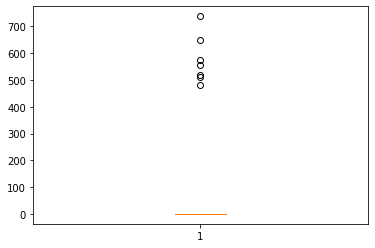

In [47]:
# outlier treatment
plt.boxplot(retained_house_sales_price['PoolArea'])
Q1 = retained_house_sales_price['PoolArea'].quantile(0.1)
Q3 = retained_house_sales_price['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
retained_house_sales_price = retained_house_sales_price[(retained_house_sales_price['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (retained_house_sales_price['PoolArea'] <= Q3 + 1.5*IQR)]
retained_house_sales_price.shape

(1294, 66)

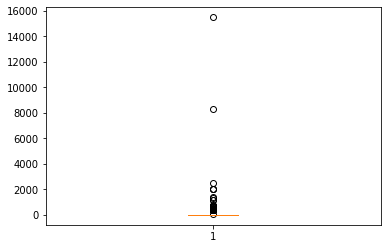

In [48]:
# outlier treatment
plt.boxplot(retained_house_sales_price['MiscVal'])
Q1 = retained_house_sales_price['MiscVal'].quantile(0.1)
Q3 = retained_house_sales_price['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
retained_house_sales_price = retained_house_sales_price[(retained_house_sales_price['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (retained_house_sales_price['MiscVal'] <= Q3 + 1.5*IQR)]
retained_house_sales_price.shape

(1274, 66)

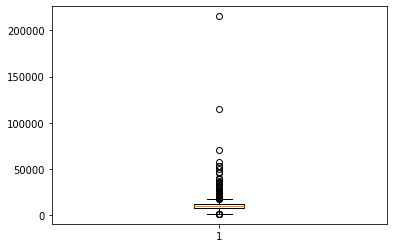

In [49]:
# outlier treatment
plt.boxplot(retained_house_sales_price['LotArea'])
Q1 = retained_house_sales_price['LotArea'].quantile(0.1)
Q3 = retained_house_sales_price['LotArea'].quantile(0.9)
IQR = Q3 - Q1
retained_house_sales_price = retained_house_sales_price[(retained_house_sales_price['LotArea'] >= Q1 - 1.5*IQR) & 
                      (retained_house_sales_price['LotArea'] <= Q3 + 1.5*IQR)]
retained_house_sales_price.shape

(1269, 66)

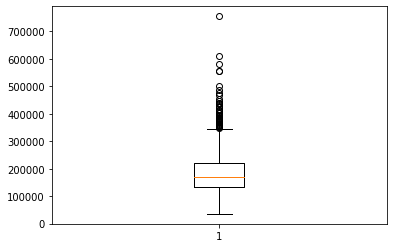

In [50]:
# outlier treatment
plt.boxplot(retained_house_sales_price['SalePrice'])
Q1 = retained_house_sales_price['SalePrice'].quantile(0.1)
Q3 = retained_house_sales_price['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
retained_house_sales_price = retained_house_sales_price[(retained_house_sales_price['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (retained_house_sales_price['SalePrice'] <= Q3 + 1.5*IQR)]
retained_house_sales_price.shape

#### Correlation Matrix

In [51]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,SalePrice
LotArea,1.000000,0.266071,0.289653,0.048213,0.015314,0.256475,0.167866,0.169014,0.083691,-0.018242,0.077065,0.040882,0.255637
TotalBsmtSF,0.266071,1.000000,0.888398,-0.231398,-0.044495,0.459447,0.511812,0.211418,0.248440,-0.103827,0.133745,-0.008461,0.601898
1stFlrSF,0.289653,0.888398,1.000000,-0.218181,-0.008609,0.556194,0.498592,0.234211,0.222792,-0.056544,0.134647,-0.013933,0.606357
2ndFlrSF,0.048213,-0.231398,-0.218181,1.000000,0.054012,0.685771,0.121404,0.082077,0.204207,0.061029,0.082586,0.013766,0.310852
LowQualFinSF,0.015314,-0.044495,-0.008609,0.054012,1.000000,0.120766,-0.007643,-0.006501,0.011423,0.044784,0.076071,-0.000818,-0.007596
GrLivArea,0.256475,0.459447,0.556194,0.685771,0.120766,1.000000,0.471088,0.242169,0.338128,0.013213,0.175578,0.001216,0.710630
GarageArea,0.167866,0.511812,0.498592,0.121404,-0.007643,0.471088,1.000000,0.205130,0.262873,-0.108645,0.061749,-0.026943,0.607990
WoodDeckSF,0.169014,0.211418,0.234211,0.082077,-0.006501,0.242169,0.205130,1.000000,0.057463,-0.130903,0.072571,-0.009547,0.306797
OpenPorchSF,0.083691,0.248440,0.222792,0.204207,0.011423,0.338128,0.262873,0.057463,1.000000,-0.096275,0.062811,-0.014933,0.320010
EnclosedPorch,-0.018242,-0.103827,-0.056544,0.061029,0.044784,0.013213,-0.108645,-0.130903,-0.096275,1.000000,0.057659,0.023846,-0.126523


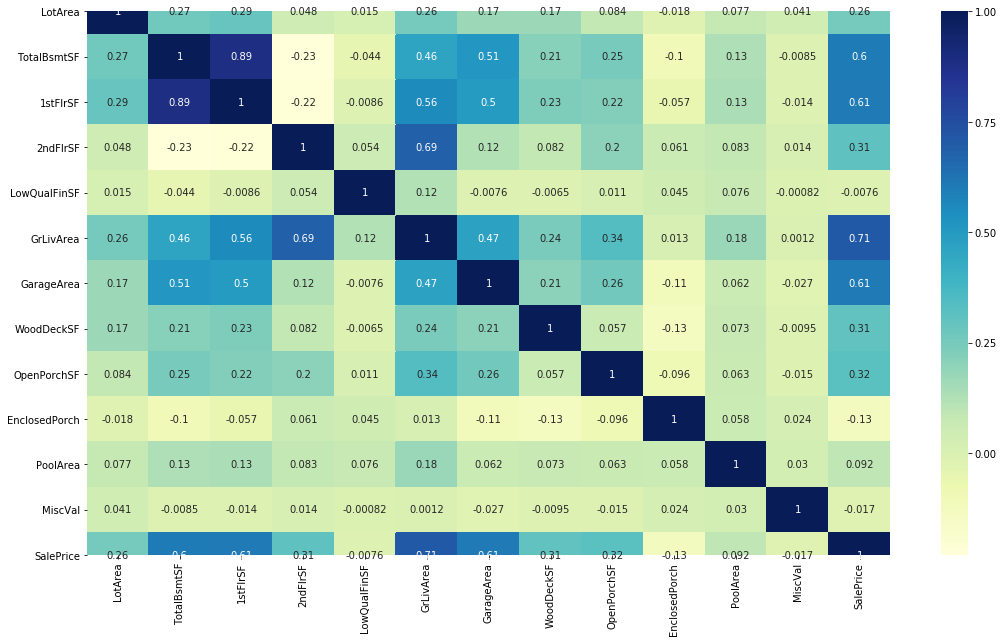

In [52]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

> From the Heatmap we can observe that attributes like TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea clearly have a strong correlation with the dependant variable SalePrice

#### Univariate Analysis on Key predictor variables and the target variable

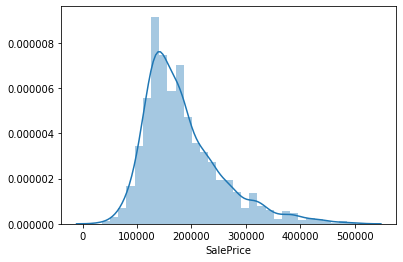

In [53]:
#Target variable: sale price of house
sns.distplot(retained_house_sales_price['SalePrice'])
plt.show()
#Normally distributed SalePrice

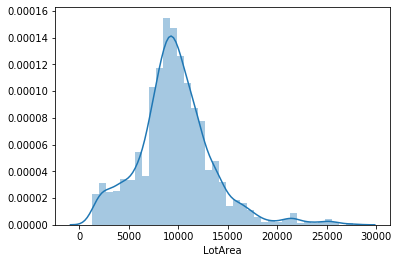

In [54]:
# Predictor variable: LotArea --> Lot size in square feet
sns.distplot(retained_house_sales_price['LotArea'])
plt.show()
#Normally distributed --- LotArea

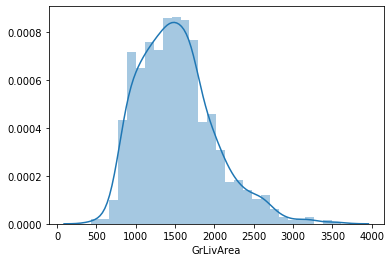

In [55]:
# Predictor variable: GrLivArea--> Above grade (ground) living area square feet
sns.distplot(retained_house_sales_price['GrLivArea'])
plt.show()
#Normally distributed but slightly bimodal

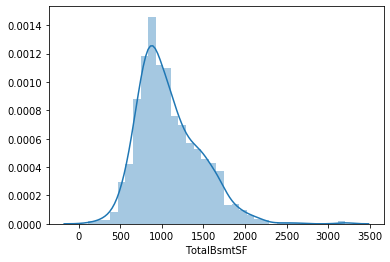

In [56]:
# Predictor variable: TotalBsmtSF ---> Total square feet of basement area
sns.distplot(retained_house_sales_price['TotalBsmtSF'])
plt.show()

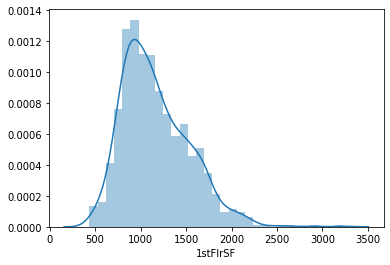

In [57]:
# Predictor variable: 1stFlrSF: First Floor square feet
sns.distplot(retained_house_sales_price['1stFlrSF'])
plt.show()
#Normally distributed with bimodaldistribution

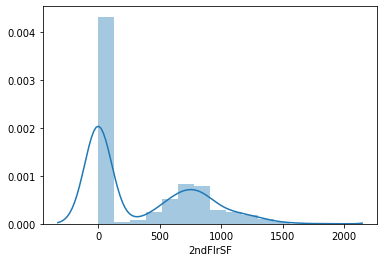

In [58]:
# Predictor variable: 2ndFlrSF: Second floor square feet
sns.distplot(retained_house_sales_price['2ndFlrSF'])
plt.show()
#Normally distributed

#### Data Preparation for Model Building

In [59]:
# split into X and y
X = retained_house_sales_price.loc[:, ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities',
                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                    'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                    'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
                    'GarageType','GarageFinish','GarageCars','GarageArea','GarageCond','PavedDrive',
                    'WoodDeckSF','OpenPorchSF','EnclosedPorch','PoolArea',
                    'MiscVal','MoSold','YrSold','SaleType','SaleCondition']]

y = retained_house_sales_price['SalePrice']

In [60]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,OK,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Others,Feedr,Norm,...,SBrkr,TA,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,OK Fireplace,Detchd,Unf,OK,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal


In [61]:
# convert categorical variables into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [63]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [64]:
X.shape

(1269, 192)

#### Scaling the data

In [65]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

In [66]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Model Building and Evaluation

> Ridge and Lasso Regression \
**First Lasso regression will be done to reduce the number of predictor variables**

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   32.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.289602,0.037608,0.001003,0.000003,0.0001,{'alpha': 0.0001},-16908.356899,-17988.326775,-17461.395456,-18297.261646,...,-17365.742940,760.600793,28,-12730.414354,-12554.104851,-12928.775732,-12271.221233,-13104.015033,-12717.706240,289.848438
1,0.276196,0.033270,0.002002,0.000001,0.001,{'alpha': 0.001},-16908.337772,-17988.194294,-17461.357645,-18297.243587,...,-17365.694462,760.586846,27,-12730.412533,-12554.105289,-12928.773049,-12271.221405,-13104.014035,-12717.705262,289.847663
2,0.274402,0.040538,0.001401,0.000489,0.01,{'alpha': 0.01},-16908.146501,-17986.869644,-17460.980178,-18297.193417,...,-17365.235856,760.479363,26,-12730.394958,-12554.110931,-12928.750988,-12271.223739,-13104.005104,-12717.697144,289.840560
3,0.270000,0.039343,0.001399,0.000491,0.05,{'alpha': 0.05},-16907.296406,-17980.984563,-17459.316424,-18297.039792,...,-17363.215311,760.021380,25,-12730.316847,-12554.145357,-12928.707374,-12271.237722,-13103.967354,-12717.674931,289.815269
4,0.273401,0.030493,0.001399,0.000490,0.1,{'alpha': 0.1},-16906.233788,-17974.419614,-17457.277197,-18296.885993,...,-17360.870686,759.583989,24,-12730.219557,-12554.190523,-12928.663317,-12271.284341,-13103.921387,-12717.655825,289.776293
5,0.277999,0.034435,0.001401,0.000488,0.2,{'alpha': 0.2},-16904.108551,-17969.068095,-17453.319959,-18296.540056,...,-17357.758807,759.967950,23,-12730.027531,-12554.298310,-12928.490985,-12271.385905,-13103.831618,-12717.606870,289.682162
6,0.277200,0.040976,0.001199,0.000402,0.3,{'alpha': 0.3},-16901.983315,-17963.563409,-17449.306236,-18296.194625,...,-17354.601950,760.334521,22,-12729.835506,-12554.405445,-12928.365038,-12271.487446,-13103.740097,-12717.566706,289.594424
7,0.277597,0.041587,0.001402,0.000490,0.4,{'alpha': 0.4},-16899.858078,-17958.001517,-17445.314257,-18295.848830,...,-17351.439721,760.693481,21,-12729.643480,-12554.510142,-12928.240645,-12271.588994,-13103.648457,-12717.526344,289.507178
8,0.288197,0.027434,0.001601,0.000491,0.5,{'alpha': 0.5},-16897.732841,-17952.388360,-17441.347243,-18295.503038,...,-17348.263949,761.061871,20,-12729.451455,-12554.611871,-12928.118111,-12271.690541,-13103.538862,-12717.482168,289.415771
9,0.276998,0.029656,0.001601,0.000489,0.6,{'alpha': 0.6},-16895.607605,-17946.801804,-17437.407773,-18295.157245,...,-17345.089980,761.453406,19,-12729.259430,-12554.710291,-12927.997727,-12271.792088,-13103.414129,-12717.434733,289.321034


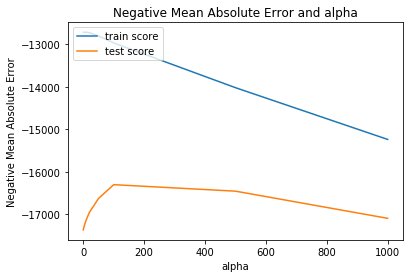

In [69]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
model_cv.best_params_

{'alpha': 100}

In [71]:
# get the best estimator for lambda

model_cv.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-4.65367085e+03,  3.96576706e+03,  1.26961692e+04,  6.85525749e+03,
        9.50070602e+03,  0.00000000e+00,  7.07215443e+03,  0.00000000e+00,
        2.23013542e+04,  5.16244685e+03,  1.03498138e+03,  6.63860684e+02,
        2.23776583e+02, -2.07808355e+03, -2.85966637e+03,  3.06319405e+02,
        2.53037855e+03,  4.82729664e+03,  1.81712679e+03,  3.98949595e+02,
        1.62481133e+03,  3.71518854e+02,  0.00000000e+00,  0.00000000e+00,
        4.79743086e+02, -1.06692190e+02,  2.04662556e+03,  4.00531509e+02,
        2.08280302e+03,  9.04626234e+02,  6.61617706e+02,  1.03933839e+03,
       -7.20867862e+02, -1.23456010e+03,  1.87764787e+03,  4.86624927e+02,
        1.28220901e+02,  0.00000000e+00,  1.19832606e+03, -1.51574070e+03,
       -6.85830126e+02,  0.00000000e+00,  6.83234007e+02, -2.75200938e+03,
       -1.75868177e+03,  2.39561292e+03, -2.76879527e+03, -3.28823599e+03,
       -1.13894405e+02, -1.92431676e+03, -4.50255046e+03, -2.31017971e+03,
        3.78275916e+03,  

In [74]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))

[('constant', 183163.4), ('MSSubClass', -4653.7), ('LotArea', 3965.8), ('OverallQual', 12696.2), ('OverallCond', 6855.3), ('TotalBsmtSF', 9500.7), ('1stFlrSF', 0.0), ('2ndFlrSF', 7072.2), ('LowQualFinSF', 0.0), ('GrLivArea', 22301.4), ('BsmtFullBath', 5162.4), ('BsmtHalfBath', 1035.0), ('FullBath', 663.9), ('HalfBath', 223.8), ('BedroomAbvGr', -2078.1), ('KitchenAbvGr', -2859.7), ('TotRmsAbvGrd', 306.3), ('Fireplaces', 2530.4), ('GarageCars', 4827.3), ('GarageArea', 1817.1), ('WoodDeckSF', 398.9), ('OpenPorchSF', 1624.8), ('EnclosedPorch', 371.5), ('PoolArea', 0.0), ('MiscVal', 0.0), ('MoSold', 479.7), ('YrSold', -106.7), ('MSZoning_FV', 2046.6), ('MSZoning_RH', 400.5), ('MSZoning_RL', 2082.8), ('MSZoning_RM', 904.6), ('Street_Pave', 661.6), ('LotShape_IR2', 1039.3), ('LotShape_IR3', -720.9), ('LotShape_Reg', -1234.6), ('LandContour_HLS', 1877.6), ('LandContour_Low', 486.6), ('LandContour_Lvl', 128.2), ('Utilities_NoSeWa', 0.0), ('LotConfig_CulDSac', 1198.3), ('LotConfig_FR2', -1515.7)

In [75]:
# model with optimal alpha
# lasso regression
lm1 = Lasso(alpha=100)
lm1.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm1.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R-Square Score: {}".format(r_square_score))

R-Square Score: 0.9175748986292436


> ##### From the R square value we see that the model 
Built using lasso regression can have 90% accuracy in its prediction capability.
R-squared (R2) explains the proportion of variation in the outcome (Sale Price) that is explained by the predictor variables. 

In [76]:
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,constant,183163.4
9,GrLivArea,22301.4
3,OverallQual,12696.2
5,TotalBsmtSF,9500.7
90,YearBuilt_2001-2010,7682.3
7,2ndFlrSF,7072.2
4,OverallCond,6855.3
89,YearBuilt_1991-2000,6478.5
169,Functional_Typ,6285.7
10,BsmtFullBath,5162.4


In [77]:
X_train.shape

(888, 192)

In [78]:
#AIC and BIC Calculation
n= 888 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:172346825521.66254
AIC:17146.417035546863
BIC:17625.31420984608


#### Ridge Regression

> #### Based on the predictor variables having high coefficients in Lasso Regression model, we will shortlist these and perform Ridge regression to further regularize the regression model

In [79]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(2)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-4653.67
1,LotArea,3965.77
2,OverallQual,12696.17
3,OverallCond,6855.26
4,TotalBsmtSF,9500.71
...,...,...
150,SaleType_New,5050.18
151,SaleType_WD,171.81
152,SaleCondition_Alloca,341.13
153,SaleCondition_Family,-509.68


In [80]:
# split into X and y, X being selected from predictor variables found in Lasso model
X = retained_house_sales_price.loc[:, ['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'MSZoning',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']]

y = retained_house_sales_price['SalePrice']

In [81]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,BsmtExposure,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,No,Ex,Y,Gd,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Others,Feedr,Norm,1Fam,...,Gd,Ex,Y,TA,Typ,Attchd,RFn,Y,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Mn,Ex,Y,Gd,Typ,Attchd,RFn,Y,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,No,Gd,Y,Gd,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Av,Ex,Y,Gd,Typ,Attchd,RFn,Y,WD,Normal


In [82]:
# convert categorical variables into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [83]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [84]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [85]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [86]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011399,0.002871,0.001799,0.000400,0.0001,{'alpha': 0.0001},-16898.130330,-18000.090728,-17475.822444,-18293.547926,...,-17369.239313,761.649884,26,-12730.382881,-12554.763574,-12929.653229,-12271.108290,-13103.931249,-12717.967844,289.914360
1,0.009602,0.000489,0.001399,0.000490,0.001,{'alpha': 0.001},-16897.976592,-17999.589021,-17475.472105,-18293.564244,...,-17368.850009,761.878677,25,-12730.352831,-12554.710267,-12929.628550,-12271.112204,-13103.914094,-12717.943589,289.910726
2,0.010601,0.002243,0.001399,0.000490,0.01,{'alpha': 0.01},-16896.440744,-17994.646543,-17471.998989,-18293.726176,...,-17364.986273,764.170635,24,-12730.060638,-12554.180989,-12929.382745,-12271.151359,-13103.742365,-12717.703619,289.874191
3,0.012600,0.000488,0.001601,0.000489,0.05,{'alpha': 0.05},-16889.648120,-17974.188172,-17457.176859,-18294.418991,...,-17348.417406,774.418803,23,-12728.784827,-12552.155123,-12928.309949,-12271.325658,-13103.154212,-12716.745954,289.725726
4,0.009802,0.000749,0.001398,0.000489,0.1,{'alpha': 0.1},-16881.233033,-17951.564978,-17439.860508,-18295.226962,...,-17328.930936,787.271660,22,-12727.346791,-12550.991896,-12927.007262,-12271.543829,-13103.262987,-12716.030553,289.618505


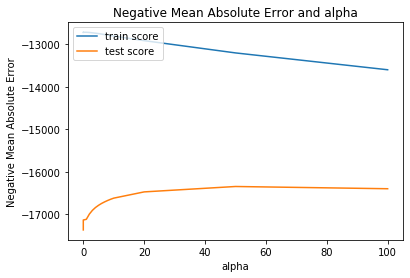

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
model_cv.best_params_

{'alpha': 50}

In [90]:
# get the best estimator for lambda

model_cv.best_estimator_

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [91]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-3.16064221e+03,  4.12162678e+03,  1.20258885e+04,  6.00091584e+03,
        8.66024691e+03,  5.55396113e+03,  9.34354241e+03,  3.12424006e+02,
        1.26428159e+04,  5.14800798e+03,  1.01254274e+03,  1.87666562e+03,
        1.36997804e+03, -2.11279255e+03, -3.10202807e+03,  2.31209317e+03,
        3.12945765e+03,  4.54839367e+03,  2.96452558e+03,  5.60368525e+02,
        1.81005636e+03,  4.54942468e+02,  0.00000000e+00,  0.00000000e+00,
        6.76866247e+02, -2.23655015e+02,  2.19574550e+03,  5.18470008e+02,
        2.40750676e+03,  1.19926761e+03,  9.36022908e+02,  1.16691768e+03,
       -7.66301344e+02, -1.57633188e+03,  2.07446353e+03,  6.22762856e+02,
        3.98681448e+02,  3.82683235e-27,  1.26202656e+03, -1.59502683e+03,
       -8.02156254e+02, -1.13190780e+01,  8.92364309e+02, -2.76345538e+03,
       -1.45377262e+03,  2.60123845e+03, -2.46299451e+03, -3.28983658e+03,
       -3.79912520e+02, -1.63617284e+03, -3.93550051e+03, -2.19079930e+03,
        4.24335044e+03,  

In [92]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
#Predictor Variables from the Model built using Ridge Regression:

[('constant', 183140.831),
 ('MSSubClass', -3160.642),
 ('LotArea', 4121.627),
 ('OverallQual', 12025.888),
 ('OverallCond', 6000.916),
 ('TotalBsmtSF', 8660.247),
 ('2ndFlrSF', 5553.961),
 ('LowQualFinSF', 9343.542),
 ('GrLivArea', 312.424),
 ('BsmtFullBath', 12642.816),
 ('BsmtHalfBath', 5148.008),
 ('FullBath', 1012.543),
 ('HalfBath', 1876.666),
 ('BedroomAbvGr', 1369.978),
 ('KitchenAbvGr', -2112.793),
 ('Fireplaces', -3102.028),
 ('GarageCars', 2312.093),
 ('GarageArea', 3129.458),
 ('WoodDeckSF', 4548.394),
 ('OpenPorchSF', 2964.526),
 ('EnclosedPorch', 560.369),
 ('MoSold', 1810.056),
 ('MSZoning_FV', 454.942),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 676.866),
 ('LotShape_IR2', -223.655),
 ('LotShape_IR3', 2195.746),
 ('LotShape_Reg', 518.47),
 ('LandContour_HLS', 2407.507),
 ('LandContour_Low', 1199.268),
 ('LandContour_Lvl', 936.023),
 ('Utilities_NoSeWa', 1166.918),
 ('LotConfig_CulDSac', -766.301),
 ('LotConfig_FR2', -1576.332),
 ('LotConfig_FR3', 207

In [93]:
# model with optimal alpha
# Ridge regression
lm2 = Ridge(alpha=50)
lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm2.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R-Square Score: {}".format(r_square_score))

R-Square Score: 0.9153528219950483


In [94]:
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,constant,183140.831
9,BsmtFullBath,12642.816
3,OverallQual,12025.888
7,LowQualFinSF,9343.542
5,TotalBsmtSF,8660.247
4,OverallCond,6000.916
6,2ndFlrSF,5553.961
10,BsmtHalfBath,5148.008
169,SaleType_Con,5112.184
54,Neighborhood_Timber,4651.864


In [95]:
X_train.shape

(888, 192)

In [96]:
#AIC and BIC Calculation
n= 888 # n is equal to total datapoints on which model is built
k= 50 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:176993078272.34802
AIC:17070.03939132224
BIC:17309.487978471847


#### Conclusion :
> The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge -> 50
    - Lasso -> 100
  These are the optimal values of lambda or the hyerparameters for regularization of the regression model.

> **Based on both the Ridge and Lasso Models, the key predictor variables for predicting the Sale Price of Houses in Australia are as follows:**
    - 'MSSubClass', 
    - 'LotArea', 
    - 'OverallQual', 
    - 'OverallCond', 
    - 'TotalBsmtSF', 
    - 'BsmtFullBath', 
    - 'LowQualFinSF', 
    - 'BsmtHalfBath', 
    - 'YearBuilt', 
    - 'HeatingQC', 
    - 'SaleType', 
    - 'SaleCondition', 
    - 'GarageCond', 
    - 'Exterior1st', 
    - 'Neighborhood', 
    - 'Fireplaces', 
    - 'Condition1', 
    - 'RoofStyle', 
    - 'Exterior2nd', 
    - 'KitchenQual', 
    - 'Functional', 
    - 'GarageType'

> Top 5 Features from above models would be: 
- BsmtFullBath
- OverallQual
- LowQualFinSF
- TotalBsmtSF
- OverallCond

> #### The answer to how well these variables describe the price of a house, is determined from the value of the R2-score and AIC, BOC values.
The model prediction capability is 91% that is highly acceptable. R2 score provides a measure of how well future samples are likely to be predicted by the model. 
In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.In this model, the AIC is 17000 whic is high. Also the BIC which provides a measure of penalty for additional variables. It is 17000 again high.